----

[Link to this document's Jupyter Notebook](HW3-Skin.ipynb)

In order to successfully complete this assignment, you must follow all the instructions in this notebook and upload your edited ipynb file to [D2L](http://d2l.msu.edu/) with your answers on or before **11:59pm on Friday March 12th**.

**BIG HINT:** Read the entire homework before starting.  

# Homework 3: Color based image segmentation

Image segmentation is the process of separating the stuff you are interested in (foreground) with stuff you are not interested in (background).  Color is often used as an easy way to segment images.  Thresholds are selected for pixels in a range of color and defined as either foreground or background.

Faces come in a diverse range of colors making them difficult to segment using traditional **<font color="red">Red</font>**, **<font color="green">Green</font>** and **<font color="blue">Blue</font>** values.  

<img src="https://i.pinimg.com/236x/b6/dc/3f/b6dc3fb5f55696cb85bc1b849a24a36d--american-indians-children-books.jpg">

In this question we are going to use eigenvectors and Principal Component Analysis (PCA) to learn a new "skin tone colorspace" designed to make it much easier to segment faces (skin colors) from the background. 

In [2]:
#Some python packages you may need in this homework.

%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

To start we are going to download a bunch of color values from the following website.  

> https://archive.ics.uci.edu/ml/datasets/skin+segmentation#

The file we are interested in is linked below:

> https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt

The file contains thousands of colors selected from a diverse population of face images.  Note these colors are in the order BGR or **<font color="blue">Blue</font>**, **<font color="green">Green</font>** and **<font color="red">Red</font>**.  The file also contains hundreds of BGR colors selected from non-faces (these non-face colors are used in machine learning but are discarded for this homework). The fourth number in each row is a label where the number one (1) indicates the row is a skin color and two (2) indicates a non-skin color. 

The following cells downloads the file, removes all of the non-skin values, reorders the points to RGB and plots the skin points as a scatter plot in traditional **<font color="red">R</font>** **<font color="green">G</font>** **<font color="blue">B</font>** space. 

In [3]:
#get the data file from the internet:
from urllib.request import urlopen, urlretrieve

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'
file = "Skin_NonSkin.txt"

response = urlopen(url)
data = response.read()      # a `bytes` object
text = data.decode('utf-8') 
lines = text.split('\r\n')

data = []

#Read in file line by line
for line in lines:
    try:
        if line:
            data.append(list(map(int, line.split('\t'))))
    except:
        print('invalid line of data:',line)
response.close()

In [4]:
#Convert the file to a list of points
P = np.matrix(data)
P.shape

In [5]:
#Mask out only face values and keep just the RGBs
mask = np.array(P[:,3]==1)
mask = mask.flatten()
points = P[mask,:]

## Change order to Red, Green, Blue
points = points[:,(2,1,0)]

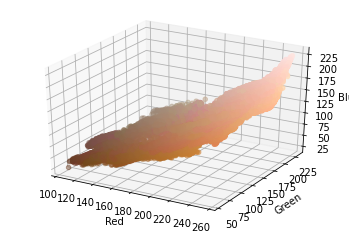

In [6]:
# Plot the points in 3D using their actual color values
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:,0], points[:,1], points[:,2], c=points/255)

ax.set_xlabel('Red');
ax.set_ylabel('Green');
ax.set_zlabel('Blue');


&#9989; **<font color=red>Question 1</font>**: (10 points) Calculate the average (mean) Red, Green and Blue values in the ```points``` plotted in the above figure.  Store the these values in a vector named ```mn```. 

In [24]:
#Put your answer to the above question here
#a = np.mean(points[:,0])
#b = np.mean(points[:,1])
#c = np.mean(points[:,2])


mn = np.mean(points)
mn

In [25]:
from answercheck import checkanswer
checkanswer.detailedwarnings=False
checkanswer.vector(mn,"1fa50978a380472875752d3d083afa41");

Testing Answer
Answer seems to be incorrect



AssertionError: Answer is incorrect 809950cb29172288685571d6f272c8a7

&#9989; **<font color=red>Question 2</font>**: (10 points) Subtract the mean values (```mn```) from each of the ```points``` (i.e. center the points around the origin and store these in a new matrix called ```A``` (This is the first step in PCA).

In [ ]:
#put your answer to the above question here.

A = 

In [ ]:
from answercheck import checkanswer
checkanswer.detailedwarnings = False;
checkanswer.matrix(A, "968ac30b396e941c60b6fcfeade0335c");

&#9989; **<font color=red>Question 3</font>**: (5 points) Plot the adjusted points again and make sure they are approximately centered around the origin. **_NOTE_**: keep the color input to scatter the same so we see the original colors in the graph.

In [ ]:
# YOUR CODE HERE

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(A[:,0], A[:,1], A[:,2], c=A/255)

ax.set_xlabel('Red');
ax.set_ylabel('Green');
ax.set_zlabel('Blue');


raise NotImplementedError()

&#9989; **<font color=red>Question 4</font>**: (10 points) Calculate the $3 \times 3$ Gram matrix $C = A^TA$.

In [ ]:
##Put your answer to the above question here

C = A.T*A

In [ ]:
from answercheck import checkanswer
checkanswer.matrix(C, "267893b255a1b2035403c91c74443a63");

&#9989; **<font color=red>Question 5</font>**: (10 points) Calculate the eigenvalues and eigenvectors of the Gram matrix $C$.

In [ ]:
# YOUR CODE HERE

numpy.linalg.eig(C)

raise NotImplementedError()

&#9989; **<font color=red>Question 6</font>**: (10 points) Use the eigenvectors found in Question 5 to create a $3 \times 3$ orthonormal color transformation matrix ```T``` that can transform points from RGB space into the new principal component's color space. I.e. the rows of the transformation matrix should consist of the three normalized eigenvectors sorted from largest to smallest eigenvalues (largest on top). 

In [ ]:
# Put your answer here  

T = 

In [ ]:
from answercheck import checkanswer
checkanswer.matrix(T, "dca594755c0e0df561f15b04bff2d091");

Now lets download and view an example image that has faces and see if we can segment out the faces using skin color.

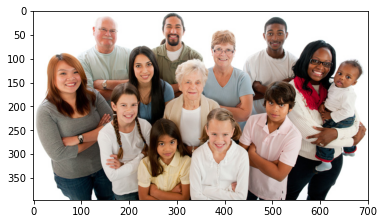

In [26]:
from imageio import imread

url = 'https://hecatedemeter.files.wordpress.com/2013/12/diverse-crowd.jpg'
file = 'Faces.jpg'

urlretrieve(url,file);

im = imread(file)
plt.imshow(im);

The following code "unwraps" this image and puts it into a new im_points matrix:

In [27]:
#Turn into into 3 x n vector
im_points = im.reshape((im.shape[0]*im.shape[1],3))
im_points.shape

&#9989; **<font color=red>Question 7</font>**: (10 points) Now take the image points and center them using the mean vector ```mn``` calculated above into a new matrix ```im_A```.

In [ ]:
#Put your answer to the above question here

im_A = 

In [ ]:
from answercheck import checkanswer
checkanswer.matrix(im_A, "0394347f996826c68245671d07e5bcf4");

&#9989; **<font color=red>Question 8</font>**: (5 points) Plot the centered ```im_A``` in the **<font color="red">R</font>** **<font color="green">G</font>** **<font color="blue">B</font>** space as above. **_NOTE:_** make sure you use the original image points for the color variable in scatter.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

&#9989; **<font color=red>Question 9</font>**: (10 points) Use the $3 \times 3$ color transformation matrix (```T```) calculated above to transform the ```im_A``` points into the new face PCA colorspace. Name the new points  ```color_points``` which should have the same shape as ```im_points```.

In [ ]:
# Put your answer to the above question here.

In [ ]:
##Checking size only.
assert(color_points.shape == im_A.shape)

The next step transforms the ```color_points``` back into image matrices

In [29]:
# Turn each component back into a square image
principal_axis_1 = np.array(color_points[:,0].reshape(im[:,:,0].shape))
principal_axis_2 = np.array(color_points[:,1].reshape(im[:,:,0].shape))
principal_axis_3 = np.array(color_points[:,2].reshape(im[:,:,0].shape))

NameError: name 'color_points' is not defined

Because we are dealing with pictures, we should be able to visualize how each color point in the image falls on the eigvenvectors (aka principal components vectors).  The following code shows each principal axis as a grayscale image and the combined picture in a "skin tone" colorspace (where the first principal axis is mapped to Red, the second to Green and the third to Blue).  This last one doesn't really tell us that much but it is interesting

NameError: name 'principal_axis_1' is not defined

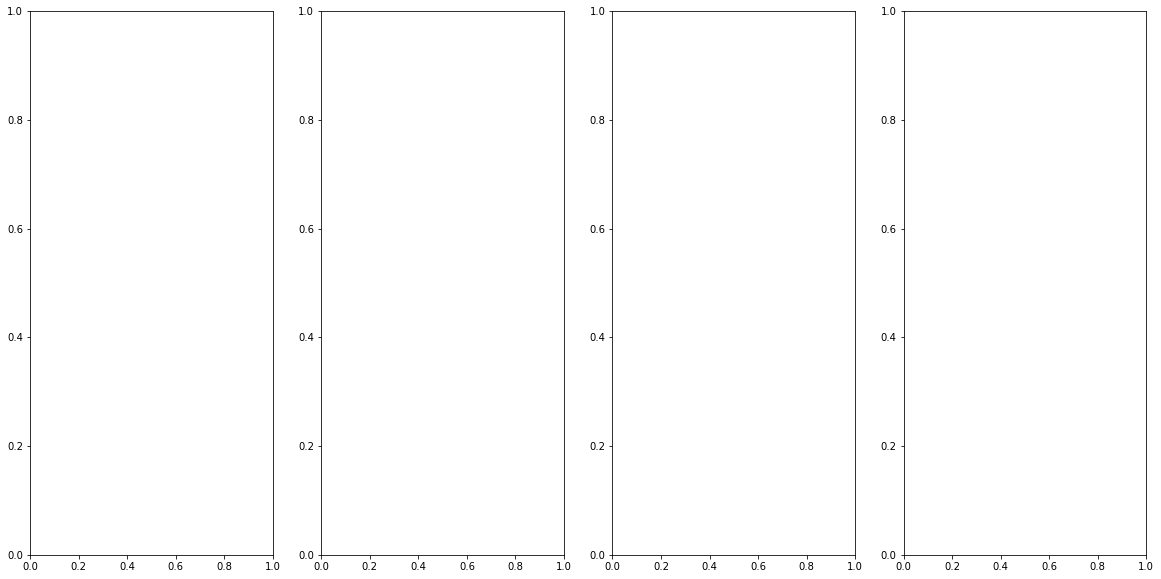

In [28]:
f, ax = plt.subplots(1,4, figsize=(20,10))

ax[0].imshow(principal_axis_1, cmap='gray')
ax[0].axis('off')
ax[0].set_title('pricipal axis')
ax[1].imshow(principal_axis_2, cmap='gray')
ax[1].axis('off')
ax[1].set_title('second pricipal axis')
ax[2].imshow(principal_axis_3, cmap='gray');
ax[2].axis('off')
ax[2].set_title('third pricipal axis');

combined = im.copy()
combined[:,:,0] = principal_axis_1
combined[:,:,1] = principal_axis_2
combined[:,:,2] = principal_axis_3

ax[3].imshow(combined);
ax[3].axis('off')
ax[3].set_title('Combined');


Now, if we assume we did everything right the first picture on the right should represent the values on the first principal axis.  The second and third image are orthogonal to the first. If we assume that most of the variance in the face colors are represented in this first image than we can model faces (skin) as the values close to this axis.  

Or, another way to look at is is the points closest to the first axis are more like skin colors and the points farther away from the first image is less like a skin.  Points farther away from the first axis will have large values in the second and third principal axes.  


&#9989; **<font color=red>Question 10</font>**: (10 points) create a new matrix (same size as the image) with values equal to the euclidian distance of each of the PCA points to the first principal axis. In other words, write code to do the following where $p_2$ is the second principal axis and $p_3$ is the third: 

$$ distance = \sqrt{p_2^2 + p_3^2}$$


In [ ]:
#Put your answer to the above question here.

In [ ]:
from answercheck import checkanswer
checkanswer.matrix(distance, "8e1e05f148bc760af2e4d43c3f816cdc");

We can then display this distance using the following code:

In [ ]:
plt.imshow(distance, cmap='viridis')
plt.colorbar()

Low distances in the above distance matrix should represent colors close to "skin" and larger distances should represent colors farther away from skin.  

Use the following code to pick a threshold to try and best highlight the pixels in the image that represent skin.

In [ ]:
distance_threshold = 20

In [ ]:
segment =  distance < distance_threshold

f, ax = plt.subplots(1,2, figsize=(20,10))

ax[0].imshow(segment, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Segmented Image Mask')
ax[1].imshow(im)
ax[1].axis('off')
ax[1].set_title('Original Image')


If we did everything right the right-hand picture above should be a mask of all pixels in the left hand images that are skin tones.  Obviously this is not a perfect model.

&#9989; **<font color=red>Question 11</font>**: (10 points) The above model fails to find really dark skin tones.  Results like these are often viewed as racist. What are the main causes of bias in this model and what could be done to ensure that a more more representative set of skin tones are included in an updated model? 

YOUR ANSWER HERE

---------
### Congratulations, we're done!


Written by Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.